---
title: "2.1-Multiple Linear Regression"
author: "Ahmed Aredah"
date: "10.26.2023"
output: html_document
editor: visual
---

## Mathematical Formulation

When modeling the relationship between a dependent variable $y$ and multiple independent variables $x_1, x_2, \dots, x_n$, the linear equation can be written as:
\begin{equation}
y_i=\beta_0+\beta_1 x_{i 1}+\beta_2 x_{i 2}+\cdots+\beta_n x_{i n}+\epsilon_i
\end{equation}

where:

- $y_i$ is the observed value of the dependent variable for the $i^{th}$ observation.

- $x_1, x_2, \dots, x_n$ are the values of the independent variables for the $i^{th}$ observation.

- $\beta_0, \beta_1, \beta_n$ are the regression coefficients, with $\beta_0$ being the y-intercept.

- $\epsilon_i$ is the error term for the $i^{th}$ observation, capturing the difference between the observed value and the value predicted by the model.


The requirement here is to find the $\beta_i$ that minimizes the meas square error of $\epsilon_i$. 
The above could be solved in multiple ways. However, one easy way to solve it is through matrix multiplication since CPU's can deal faster with matrix manipulation.

### Matrix Notation

Given:

- $\boldsymbol{X}$ is the design matrix of size $m \times (n + 1)$.

- $\boldsymbol{y}$ is a column vector of size $m \times 1$ containing the dependent variable values.

- $\boldsymbol{\beta}$ is a column vector of size $(n + 1) \times 1$ containing the regression coefficients.

- $\boldsymbol{\epsilon}$  is a column vector of size $m \times 1$ representing the errors.



The relationship is given by:
\begin{equation}
\large{y} = \large{X} \beta + \epsilon
\end{equation}

To determine the value of $\beta$, one might think to rearrange the equation as:

\begin{equation}
\beta = \frac{\large{y}}{\large{X}}
\end{equation}

However, this representation is not accurate in the context of matrix operations. The inaccuracy arises due to the nature of matrices and how they are manipulated. Here's a breakdown of the issues:


- **Matrix Division:** In the realm of matrices, there isn't a direct concept of division like there is with regular numbers. So, saying $\beta = \frac{y}{X}$ doesn't have a straightforward meaning. 

- **Matrix Multiplication:** Matrix multiplication is not commutative. This means that the product $AB$ is not necessarily the same as the product $BA$. So, even if we were to try to "isolate" $\beta$ by some matrix operation, it wouldn't be as simple as dividing both sides by $X$. 

- **Correct Approach:** The correct way to "isolate" $\beta$ when dealing with matrices is to multiply both sides of the equation by the inverse of $X$ (assuming $X$ is invertible). The equation would look something like: $\beta = X^{-1}y$. 
    Note that this equation assumes that $X$ is a square matrix and has an inverse. If $X$ is not square, or doesn't have an inverse, other methods like the Moore-Penrose pseudoinverse would be used to estimate $\beta$. 
    
- **Dimensionality:** Even if we were to entertain the idea of matrix division, the dimensions must be compatible. In the equation $y = X\beta + \epsilon$, $y$ is a column vector of size $m \times 1$, $X$ is a matrix of size $m \times n$, and $\beta$ is a column vector of size $n \times 1$. Dividing an $m \times 1$ vector by an $m \times n$ matrix doesn't produce a consistent result in terms of matrix dimensions.

The reason we use the equation $ \boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $ instead of 
$ \boldsymbol{\beta} = \mathbf{X}^{-1} \mathbf{y} $ is due to the structure and properties of the design matrix \( \mathbf{X} \) in linear regression.


- **Non-Square Matrix:** In most real-world applications of linear regression, $\mathbf{X}$ is not a square matrix. It usually has more rows (observations) than columns (predictors). Only square matrices possess inverses in the traditional sense. Therefore, $\mathbf{X}^{-1}$ doesn't exist for these cases.

- **Pseudo-Inverse:** The expression $(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T$ is known as the Moore-Penrose pseudo-inverse of $\mathbf{X}$. This pseudo-inverse provides a means to approximate an inverse. 

- **Projection onto Column Space:** The term $\mathbf{X}^T \mathbf{y}$ can be interpreted as projecting the response vector $\mathbf{y}$ onto the column space of $\mathbf{X}$. 

- **Minimization of Residuals:** The expression $(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T$ originates from differentiating the sum of squared residuals with respect to $\boldsymbol{\beta}$ and setting it to zero.

Finally, what we are trying to accomplish is to reduce the error between the model and the actual data:
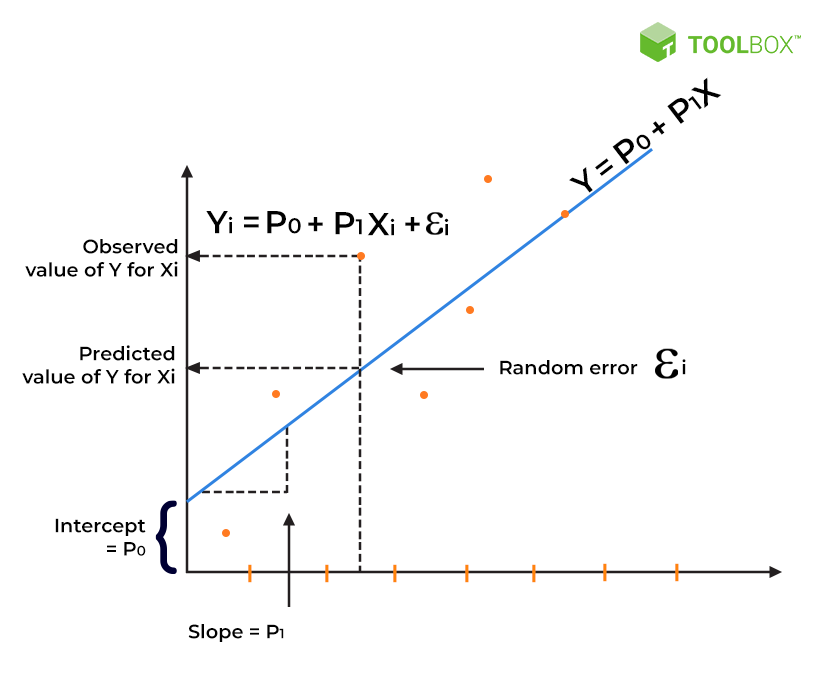

We'll be applying this concept to the cars dataset.

## Application on Cars selling Dataset

In [125]:
#import required libraries
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

#inline plots
%matplotlib inline

# Set Seaborn style to "whitegrid" for a white background with grid lines
sns.set_style("whitegrid")

#supress warnings!
warnings.simplefilter(action='ignore', category=Warning)
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

print("required libraries loaded successfully!")

required libraries loaded successfully!


In [126]:
#| echo: false
# Set the background color to black and axis label color to white
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'white'

The dataset source is accessible from [here](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv)

In [127]:
# Load the cars dataset
cars = pd.read_csv("https://raw.githubusercontent.com/AhmedAredah/MachineLearningBasics/main/data/cars.csv")

cars.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


The `describe` method in pandas provides a summary of the central tendency, dispersion, and shape of the distribution of a dataset. It returns a DataFrame that shows various descriptive statistics.

Here's what each row in the output means:

- `count`: The number of non-missing values for each variable. In this case, each variable has 342 non-missing values.
- `mean`: The average value of each variable.
- `std`: The standard deviation of each variable, which measures the amount of variation or dispersion.
- `min`: The minimum value of each variable.
- `25%`: The 25th percentile value of each variable.
- `50%`: The 50th percentile value (or median) of each variable.
- `75%`: The 75th percentile value of each variable.
- `max`: The maximum value of each variable.

In the context of linear regression, these descriptive statistics can help you understand the distribution of your variables and guide your data preprocessing steps.

One common issue to address during data preprocessing is the handling of missing values (NA values). There are several ways to deal with missing values:

1. **Remove rows with missing values**: This is the simplest approach, but it may result in loss of valuable data.
    ```python
    data = data.dropna()
    ```

2. **Replace missing values**: You can replace missing values with a specific value, such as the mean or median of the variable.
    ```python
    data['variable'].fillna(data['variable'].mean(), inplace=True)
    ```

3. **Use predictive imputation**: This involves using other variables in the dataset to predict and fill in missing values. This can be done using machine learning algorithms or other statistical methods.

Before fitting a linear regression model, it's important to check for outliers, as they can have a significant impact on your model. The `min` and `max` values in the `describe` output can help you identify any extreme values that might be outliers. You may also want to plot your data to visually inspect for outliers.

Additionally, the `mean` and `std` values can be used to standardize your variables, which is a common preprocessing step for linear regression. Standardizing your variables can make it easier to interpret the coefficients of your linear regression model, especially when your variables are on different scales.

In this case, We will just remove rows with missing values since it is easier but this could have a huge impact on the dataset.


In [128]:
# Drop rows where any cell contains NA or NAN 
cars = cars.dropna()

# show the top 5 rows
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


From the above table we need to clean the dataset first and remove strings from columns 'mileages', 'engine', 'max_power', and 'torque'

In [129]:
# List of columns to process
columns_to_process = ['mileage', 'engine', 'max_power']

for column in columns_to_process:
    # Convert the column to string type
    cars[column] = cars[column].astype(str)
    
    # Extract the first numerical value (assumes format is "value unit")
    cars[column] = cars[column].str.split().str[0]
    
    # Convert those values to float, set others to NaN if they can't be converted
    cars[column] = pd.to_numeric(cars[column], errors='coerce')


In [130]:
import re

# Function to extract the numeric part before 'Nm'
def extract_torque_value(s):
    match = re.search(r'(\d+)Nm', s)
    return float(match.group(1)) if match else None

# Apply the function to the torque column
cars['torque'] = cars['torque'].apply(extract_torque_value)
cars.dropna()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796,37.00,59.0,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.10,170.0,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399,68.10,160.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,7.0,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,7.0,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190.0,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,140.0,5.0


Before diving into machine learning, understanding the descriptive statistics of our data is crucial. It provides insights into the distribution, tendencies, and range of our data. This preliminary step ensures that we're aware of the data's characteristics, helping in making informed decisions about preprocessing, model selection, and interpretation of results. Such an understanding can aid in identifying anomalies, ensuring data quality, and setting the right expectations from the model's predictions.

In [131]:
cars.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7033.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,158.266032,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,107.169575,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,1.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,90.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,146.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,200.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,789.000000,14.000000


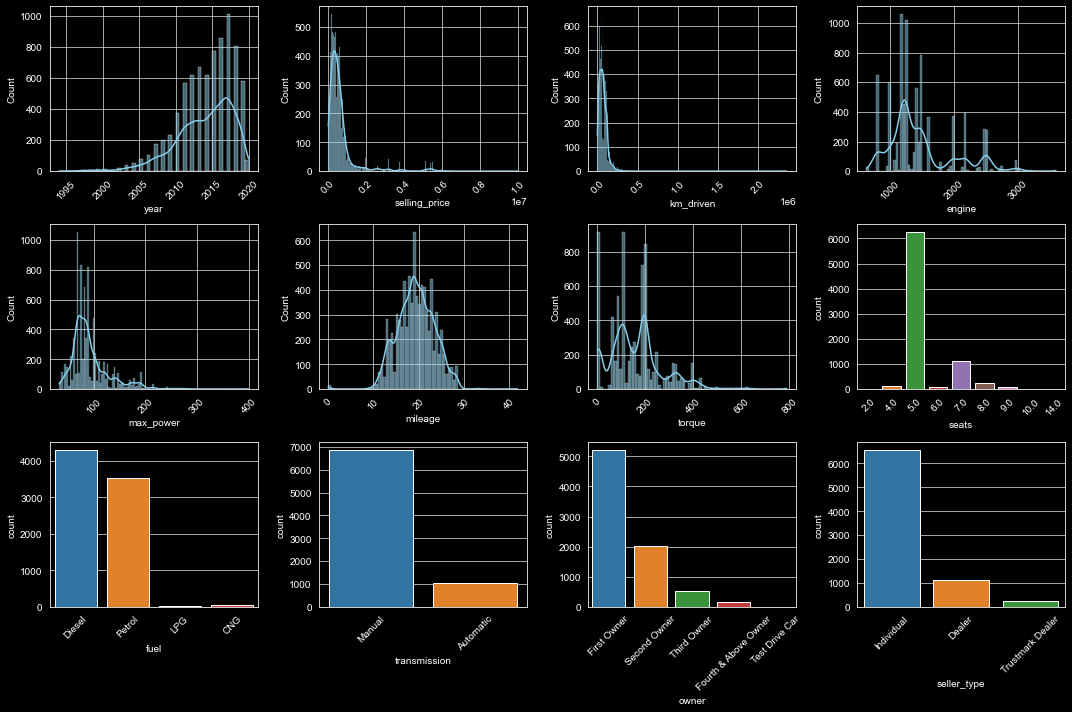

In [132]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Plot the distribution of each variable
hist1 = sns.histplot(data=cars, x='year', kde=True, ax=axes[0, 0], color='skyblue')
hist2 = sns.histplot(data=cars, x='selling_price', kde=True, ax=axes[0, 1], color='skyblue')
hist3 = sns.histplot(data=cars, x='km_driven', kde=True, ax=axes[0, 2], color='skyblue')
hist4 = sns.histplot(data=cars, x='engine', kde=True, ax=axes[0, 3], color='skyblue')
hist5 = sns.histplot(data=cars, x='max_power', kde=True, ax=axes[1, 0], color='skyblue')
hist6 = sns.histplot(data=cars, x='mileage', kde=True, ax=axes[1, 1], color='skyblue')
hist7 = sns.histplot(data=cars, x='torque', kde=True, ax=axes[1, 2], color='skyblue')

# Plot the count of each category for categorical variables
seats_plot = sns.countplot(data=cars, x='seats', ax=axes[1, 3])
fuel_plot = sns.countplot(data=cars, x='fuel', ax=axes[2, 0])
transmission_plot = sns.countplot(data=cars, x='transmission', ax=axes[2, 1])
owner_plot = sns.countplot(data=cars, x='owner', ax=axes[2, 2])
seller_plot = sns.countplot(data=cars, x='seller_type', ax=axes[2, 3])

# Make the x-axis text vertical for all plots
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation=45)

# Adjust the plot
plt.tight_layout()
plt.show()


When applying linear regression to this dataset, it's crucial to consider these distributions. The insights derived from these plots can help in feature selection, outlier detection, and in understanding the relationships between variables. For instance, the dominance of diesel and petrol cars might mean that other fuel types have less influence on the selling price. Similarly, the large number of manual transmission cars might imply that automatic transmission could be a premium feature, potentially impacting the price.

from the above distribution we find that selling price, and km_driven are positively skewed and we need to apply a transformation function to make it normally distributed.

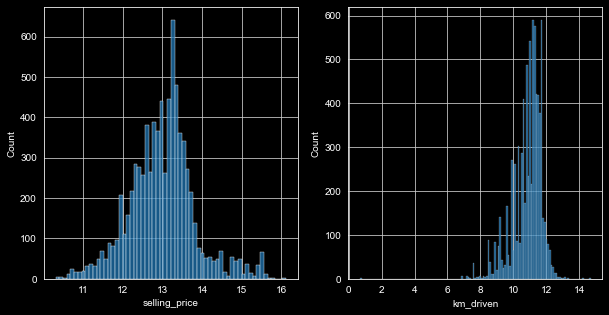

In [133]:
import numpy as np
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
transformed_data = np.log1p(cars['selling_price'])  # log1p helps in dealing with zero values in the original data
transformed_data_2 = np.log1p(cars['km_driven'])
sns.histplot(transformed_data, ax=axes[0]);
sns.histplot(transformed_data_2, ax=axes[1]);

We will compare the regression model with and without the transformation 

In [134]:
# Calculate VIF for each predictor variable
cars_numeric = cars.select_dtypes(include='number')
cars_numeric = cars_numeric.fillna(cars_numeric.mean())

vif_data = pd.DataFrame()
vif_data["variable"] = cars_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(cars_numeric.values, i) for i in range(cars_numeric.shape[1])]
vif_data.head(n=10)

,variable,VIF
0,year,140.187417
1,selling_price,4.337223
2,km_driven,2.993602
3,mileage,40.354886
4,engine,41.552858
5,max_power,34.167509
6,torque,7.961410
7,seats,66.993390


Variance Inflation Factor (VIF) is a measure that helps to identify multicollinearity in regression models. When interpreting the VIF, a general rule of thumb is that a VIF above 5-10 suggests a problematic amount of collinearity.
Given the high VIF values for 'Year', 'mileage', 'engine', 'max_power', and 'Seats', one should consider further analysis or remedial measures to address potential multicollinearity before proceeding with building a regression model.

From this, I will drop the highest 2 VIF column value and redo the analysis again.

In [135]:
cars_numeric = cars_numeric.drop(["year", "seats", "max_power"], axis=1)

In [136]:
vif_data = pd.DataFrame()
vif_data["variable"] = cars_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(cars_numeric.values, i) for i in range(cars_numeric.shape[1])]
vif_data.head(n=10)

,variable,VIF
0,selling_price,2.776218
1,km_driven,2.982095
2,mileage,4.839869
3,engine,12.135908
4,torque,7.028583


The resultant VIF indicates almost no multicolinearity in the data.

Before we proceed, let's drop the columns that we decided to drop before in the VIF analysis.

In [137]:
cars = cars.drop(["year", "seats", "max_power"], axis=1)

For the categorical data, the regression model does not understand strings (text) so we need to find a way to transfer this text in numbers. one way is to encode them which converts the categories into a series of 1,2,3 coresponding to the categorical order. OneHoteEncder does this job for us.

In [138]:
# Preprocessing: One-hot encode categorical variables
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']
one_hot = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity
encoded_features = one_hot.fit_transform(cars[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot.get_feature_names_out(categorical_columns))

In [139]:
# Concatenate encoded features with the original dataframe
cars = pd.concat([cars, encoded_df], axis=1)

# Drop the original categorical columns and other non-numeric columns
cars = cars.drop(columns=categorical_columns + ['name', 'torque'])

Again, let's make sure we dont have any missing values before we continue by filling with the mean value.

In [140]:
# Define predictors (X) and target variable (y)
X = cars.drop('selling_price', axis=1)
y = cars['selling_price']
X = X.fillna(X.mean())
y = y.fillna(y.mean())

We will do the regression model here.

#### First regression model without transformation

In [141]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
print(f"R^2 (coefficient of determination): {r2:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Model's coefficients and intercept
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

R^2 (coefficient of determination): 0.37
Mean Squared Error: 419706652720.62
Intercept: -960727.9684812507
Coefficients: [-4.21035185e+00  3.33345338e+04  9.85201248e+02 -1.36989350e+05
 -2.04315878e+05 -1.37114189e+05 -4.11308191e+04  1.61218399e+05
 -7.12835842e+03 -1.31152299e+05 -2.25614271e+04  9.90031360e+05
 -3.43569635e+04]


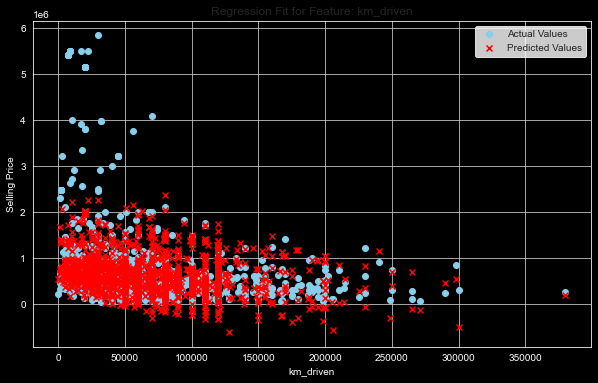

In [142]:
# Selecting the first feature for demonstration
feature_index = 0
feature_name = X.columns[feature_index]

plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted
plt.scatter(X_test[feature_name], y_test, color='skyblue', label='Actual Values')
plt.scatter(X_test[feature_name], y_pred, color='red', marker='x', label='Predicted Values')


plt.title('Regression Fit for Feature: ' + feature_name)
plt.xlabel(feature_name)
plt.ylabel('Selling Price')
plt.legend()
plt.grid(True)
plt.show()

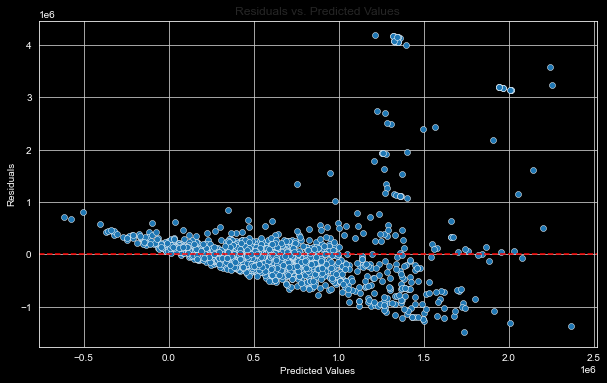

In [143]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10,6))
sns.scatterplot(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The error plot indicates the error distribution is not random and there is a trend in the error that the model could not capture. Let's then try the second regression model where we incorporate the transformation.

---

#### Second regression model with transformation
now, lets transform the selling price and km_driven columns using log() function and create a new regression model

In [144]:
cars['selling_price'] = np.log1p(cars['selling_price'])
cars['km_driven'] = np.log1p(cars['km_driven'])

In [145]:
# Define predictors (X) and target variable (y)
X = cars.drop('selling_price', axis=1)
y = cars['selling_price']
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Keep corresponding y values

In [146]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Drop rows with NaN values from X_train
X_train = X_train.dropna()
# Synchronize y_train with the updated X_train
y_train = y_train.loc[X_train.index]
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]


# Create and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
print(f"R^2 (coefficient of determination): {r2:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Model's coefficients and intercept
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

R^2 (coefficient of determination): 0.60
Mean Squared Error: 0.27
Intercept: 14.408622302677129
Coefficients: [-4.35206639e-01  7.52823926e-02  1.32585312e-03  1.64254578e-04
 -9.24979659e-02 -1.18337658e-02 -6.49937878e-02  4.32081971e-02
 -1.68184483e-02 -7.34963940e-02 -1.12130018e-02 -7.46682688e-01
 -4.84720247e-02]


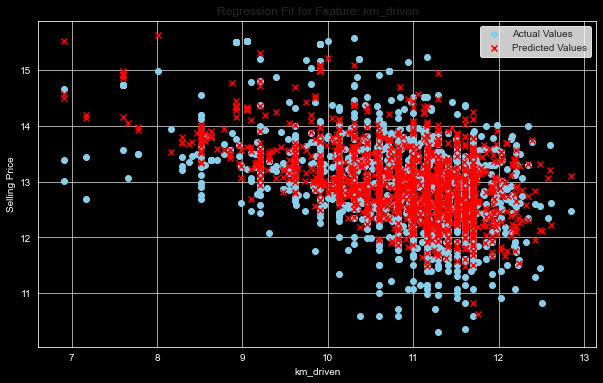

In [147]:
# Selecting the first feature for demonstration
feature_index = 0
feature_name = X.columns[feature_index]

plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted
plt.scatter(X_test[feature_name], y_test, color='skyblue', label='Actual Values')
plt.scatter(X_test[feature_name], y_pred, color='red', marker='x', label='Predicted Values')


plt.title('Regression Fit for Feature: ' + feature_name)
plt.xlabel(feature_name)
plt.ylabel('Selling Price')
plt.legend()
plt.grid(True)
plt.show()

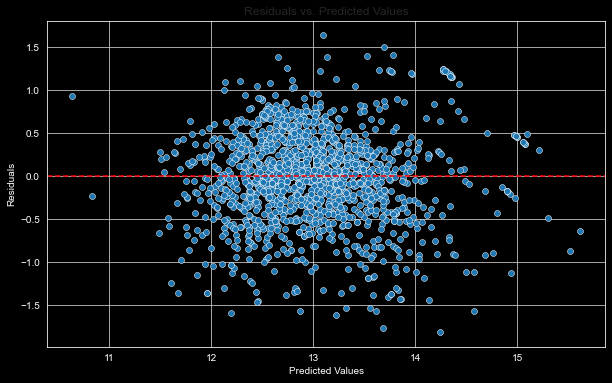

In [148]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10,6))
sns.scatterplot(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Here, the error plot indicates the error is random and does not show any trend in the data. Thus the model we have is much better than the previous model.

**by doing the transformation, we gained around 23% in the fit.**

Hence the final equation is:

\begin{equation}
\begin{split}
\text{selling\_price} = & e^{14.4086} \\
& \times e^{-0.4352 \times \log(\text{km\_driven})} \\
& \times e^{0.0753 \times \text{mileage}} \\
& \times e^{0.0013 \times \text{engine}} \\
& \times e^{0.0002 \times \text{fuel\_Diesel}} \\
& \times e^{-0.0925 \times \text{fuel\_LPG}} \\
& \times e^{-0.0118 \times \text{fuel\_Petrol}} \\
& \times e^{-0.0650 \times \text{seller\_type\_Individual}} \\
& \times e^{0.0432 \times \text{seller\_type\_Trustmark Dealer}} \\
& \times e^{-0.0168 \times \text{transmission\_Manual}} \\
& \times e^{-0.0735 \times \text{owner\_Fourth \& Above Owner}} \\
& \times e^{-0.0112 \times \text{owner\_Second Owner}} \\
& \times e^{-0.7467 \times \text{owner\_Test Drive Car}} \\
& \times e^{-0.0485 \times \text{owner\_Third Owner}}
\end{split}
\end{equation}
